In [6]:
dist_fun = function(X){
    X2 = rowSums(X^2)
    X2 = matrix(X2, nrow = length(X2), ncol = length(X2), byrow = F)
    r = X2 - 2*X%*%t(X) + t(X2)
    if(any(r<0)){
        warning("Some distances were smaller than zero! Try scaling up the locations.")
        r[r<0] = 0
    }
        
    return(r)
}

dist_index = function(X,index){
    X2 = rowSums(X^2)
    r = sum(X[index,]^2) - 2*X[index,]%*%t(X) + X2
    if(any(r<0)){
        warning("Some distances were smaller than zero! Try scaling up the locations.")
        r[r<0] = 0
    } 
    return(r)
}

groupondist = function(location, size = NULL, no_groups = NULL){
    n = nrow(location)
    left = c(1:n)

    if(is.null(no_groups) & is.null(size)){
        stop("You must determine the size or number of groups")
    }

    if(is.null(size)){
        size = ceiling(n/no_groups)
    }

    i = 1
    batch_vec = rep(paste0("b",0),n)
    while(length(left) > size){ 
        start = sample(length(left),1)
        dist = dist_index(location[left,],start)
        batch_index = order(dist)[1:size]
        batch_vec[left[batch_index]] = paste0("b",i)
        i = i+1
        
        left = left[-batch_index]
    }
    return(batch_vec)
}

In [7]:
# load dataset 1
path1 = '/gladstone/engelhardt/pelka-collaboration/HuColonCa-FFPE-ImmuOnco-LH_VMSC02001_20220427/baysor_20231207/baysor_res_merged/segmentation_cell_stats.csv.gz'
metadata = read.csv(gzfile(path1))

location = cbind(metadata$x, metadata$y)
location1 = as.matrix(location)

idx = !( is.na(location1[,1]))

location1 = location1[idx,]

batch_id1 = groupondist(location1,size = 5000)
batch_id1 = paste0("1_",batch_id1)

# load dataset 2
path2 = '/gladstone/engelhardt/pelka-collaboration/HumanColonCancerPatient1/cell_metadata.csv'
metadata = read.csv(path2, row.names = 1)

location = metadata[,c('center_x','center_y')]
location2 = as.matrix(location)

batch_id2 = groupondist(location2,size = 5000)
batch_id2 = paste0("2_",batch_id2)

# load dataset 3
path2 = '/gladstone/engelhardt/pelka-collaboration/HumanColonCancerPatient2/cell_metadata.csv'
metadata = read.csv(path2, row.names = 1)

location = metadata[,c('center_x','center_y')]
location3 = as.matrix(location)

batch_id3 = groupondist(location3,size = 5000)
batch_id3 = paste0("3_",batch_id3)


[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"
[1] "test"

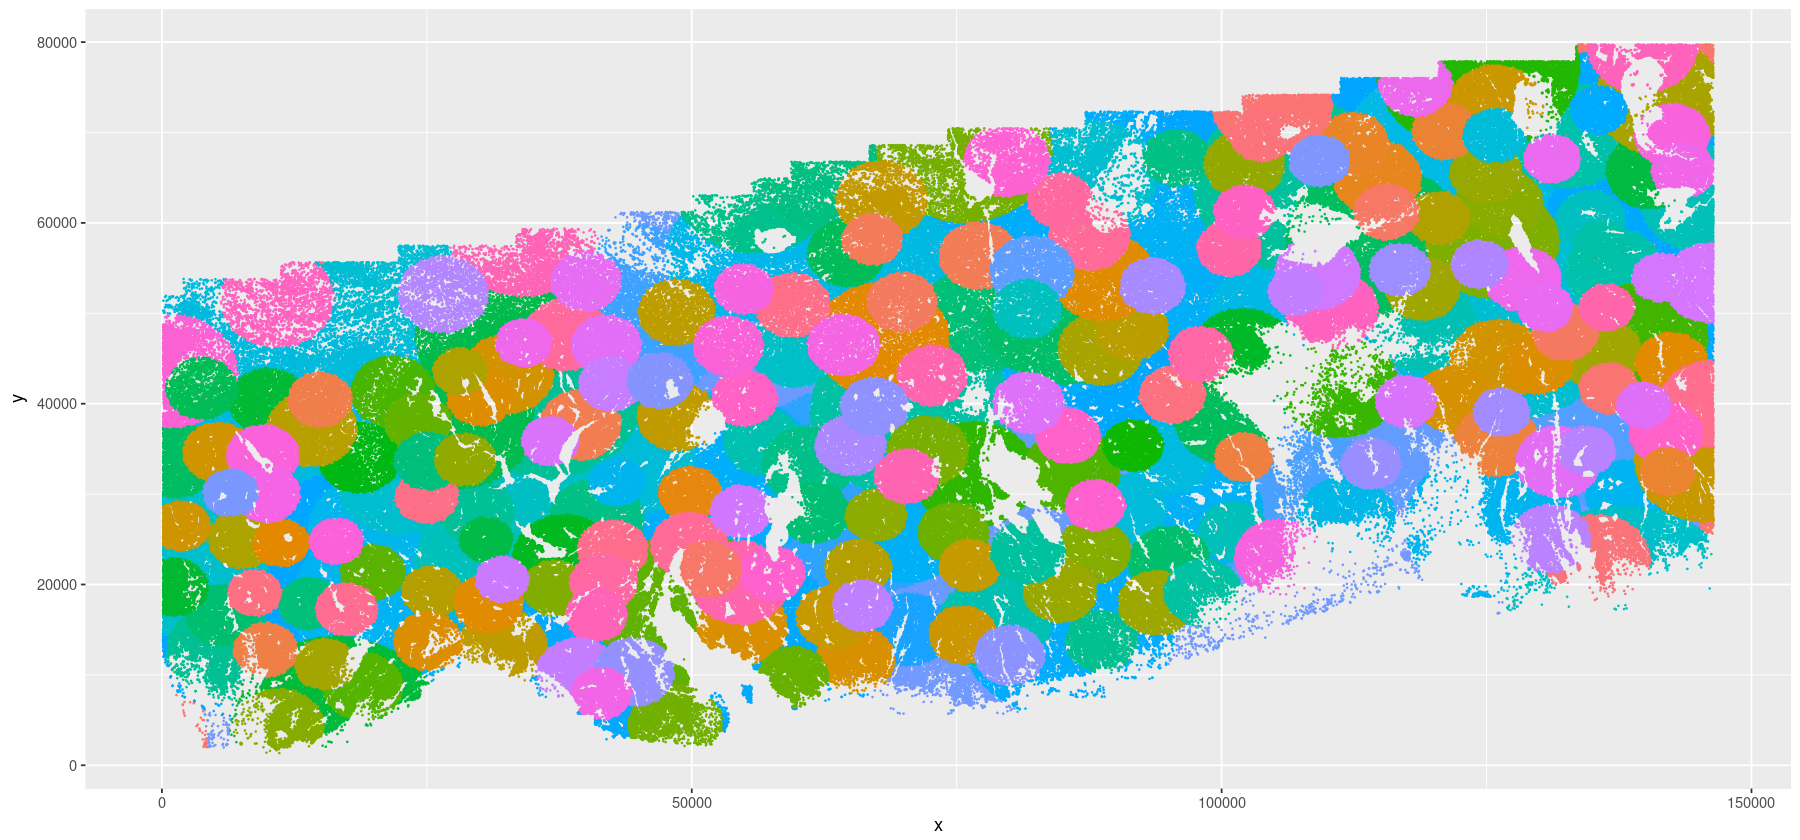

In [9]:
library(ggplot2)
options(repr.plot.width=15, repr.plot.height=7)
datplot = data.frame(x = location1[,1], y = location1[,2], idcol = batch_id1 )
datplot = datplot[sample(nrow(datplot),0.5*nrow(datplot)),]
ggplot(datplot, aes(x = x, y = y, col = idcol))+
geom_point(cex = 0.1) + 
theme( legend.position = "none")
